## Demonstrate Bayesian updating for discrete posteriors, priors, and likelihoods


Let's say we picked one of two coins.  One isn't fair (pHeads = 0.45) while the other one is (pHeads = 0.5).  After a certain number of flips, what is our degree of belief that the results came from each of the coins?

Bayes rule for this example:

\begin{equation*}
p(Fair | Flips)   = \frac{p(Flips | Fair) * p(Fair)}{p(Flips)}
\end{equation*}

\begin{equation*}
p(Unfair | Flips) = \frac{p(Flips | Unfair) * p(Unfair)}{p(Flips)}
\end{equation*}

We know that:

$$ p(Fair) + p(Unfair) = 1 $$

We'll keep track of the probabilities in a list:  
$$ [p(Fair), p(Unfair)] $$ 
<br>
We *could* have done this example by only modeling $ p(Fair) $ or $ p(Unfair) $,
but this approach is extensible to problems that have more than just two solutions.  

For example, lets say there were three coins:  
* C1 p(Heads) = 0.25
* C2 p(Heads) = 0.1
* C3 p(Heads) = 0.5  

And we were to pick one, flip it many times, and based on the outcomes determine the probability that the flips came from each coin.  
Would keep probabilities in a list:  
$$ [p(C1), p(C2), p(C3)] $$ 

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 14})

In [2]:
np.random.seed(37) # try to make it so that we all get the same result

# make the coins and select one
p_fair = 0.5 # don't change
p_not_fair = 0.45 # feel free to change (but don't use 0.5)
p = np.random.choice([p_fair, p_not_fair])

In [3]:
def indicate_coin_picked(p):
    fair = p == 0.5
    if fair:
        print("It's the fair coin (p = 0.5).")
    else:
        print(f"It's the unfair coin (p = {p}).")

In [4]:
# which coin did we get?
print(f"The coin's probability of heads is {p}.")
indicate_coin_picked(p)

The coin's probability of heads is 0.45.
It's the unfair coin (p = 0.45).


### Can we figure out, from the flips, whether it's a fair coin or not?  And if so, how soon can we know it?

In [5]:
# helper function 1

def flip_the_coin(p, flips_lst):
    '''Flips the coin with probability of success p
       and appends to the flips_lst'''
    if np.random.random() <= p:
        flips_lst.append(1) #heads (success)
    else:
        flips_lst.append(0) #tails (failure)

### Interlude on sample mean, sample vairance and confidence interval of sample mean

Let's say you have an unfair coin and you call 10 tossing one simulation, record the number of heads and run such simulation 100 times.

1. Sample mean: ![](https://mathworld.wolfram.com/images/equations/SampleMean/NumberedEquation1.gif)
2. Sample variance: ![](https://mathworld.wolfram.com/images/equations/SampleVariance/NumberedEquation4.gif)
3. How about confidence interval for sample means?
    1. Build a normal distribution from central limit theorem
    2. Bootstrapping to get more `sample means`
    3. Bayesian confidence(credible) interval, will discuss this afternoon

### Warning zone of Python programming!
#### Mutable objects will be mutated if passed to a function.

In [6]:
# test it out - initialize flips_lst
flips_lst = []

In [7]:
# do some flips (trials) - keep executing this cell
flip_the_coin(p, flips_lst)
print(flips_lst)

[1]


In [21]:
# helper function 2

def calculate_likelihood(flips_lst):
    '''Likelihood of the LAST flip in the flips_lst given by fair and unfair coin'''
    result = flips_lst[-1]
    likelihood_fair = stats.bernoulli.pmf(result, p_fair) # this will always be 0.5 
    likelihood_not_fair = stats.bernoulli.pmf(result, p_not_fair) # P_not_fair or (1-p_not_fair)
    return [likelihood_fair, likelihood_not_fair]

### Warning zone of Python programming!
#### We prefer minimizing using of global variable most of the time

In [9]:
# test it out

flips_lst = [0] # assume these were the flips we got
print(f"\nThe flip was {flips_lst[-1]}.")
likelihoods = calculate_likelihood(flips_lst)
print(f"Likelihood fair: {likelihoods[0]:0.3f}")
print(f"Likelihood not fair: {likelihoods[1]:0.3f}")

flips_lst = [0, 1] # assume these were the flips we got
print(f"\nThe flip was {flips_lst[-1]}.")
likelihoods = calculate_likelihood(flips_lst)
print(f"Likelihood fair: {likelihoods[0]:0.3f}")
print(f"Likelihood not fair: {likelihoods[1]:0.3f}")


The flip was 0.
Likelihood fair: 0.500
Likelihood not fair: 0.550

The flip was 1.
Likelihood fair: 0.500
Likelihood not fair: 0.450


In [5]:
# helper function 3

def calculate_marginal(likelihoods_lst, prior_lst):
    # prior_list: [prior prob of picking fair coin, prior prob of picking unfair coin]
    # 
    # likelihoods_list: [likelihood of picking a fair coin, likelihood of picking a unfair coin], 
    # based on LATEST observation (either head or tail)
    
    # marginal: The total probability of observing the observation P(head or tail)
    prior_fair = prior_lst[0]
    prior_unfair = prior_lst[1]
    likelihood_fair = likelihoods_lst[0]
    likelihood_not_fair = likelihoods_lst[1]
    marginal = likelihood_fair * prior_fair + likelihood_not_fair * prior_unfair
    return marginal

In [6]:
# test marginal function out
prior_lst = [0.5, 0.5] # start out not sure which coin was picked
likelihoods_lst = [0.5, 0.55] # if flip is 0
marginal = calculate_marginal(likelihoods_lst, prior_lst)
print(f"For prior of {prior_lst} and likelihoods of {likelihoods_lst} "
      f"the marginal probability is {marginal}.")

For prior of [0.5, 0.5] and likelihoods of [0.5, 0.55] the marginal probability is 0.525.


In [7]:
likelihoods_lst = [0.5, 0.45] # if flip is 1
marginal = calculate_marginal(likelihoods_lst, prior_lst)
print(f"\nFor prior of {prior_lst} and likelihoods of {likelihoods_lst} "
      f"the marginal probability is {marginal}.")


For prior of [0.5, 0.5] and likelihoods of [0.5, 0.45] the marginal probability is 0.475.


### Quick check.
Marginals must sum up to 1.

In [8]:
# helper function 4

def calculate_posterior(likelihoods_lst, prior_lst):
    # prior_list: [prior prob of picking fair coin, prior prob of picking unfair coin]
    # 
    # likelihoods_list: [likelihood of picking a fair coin, likelihood of picking a unfair coin], 
    # based on LATEST observation (either head or tail)
    
    # posterior: according to the formula, calculate the unnomralized posterior then normalize it
    marginal = calculate_marginal(likelihoods_lst, prior_lst)
    posterior_unnormalized = []
    for likelihood, prior in zip(likelihoods_lst, prior_lst):
        posterior_unnormalized.append(likelihood * prior / marginal)
    
    # now need to normalize so that the total probability in posterior is 1
    posterior_un_total = sum(posterior_unnormalized)
    posterior_lst = []
    for posterior in posterior_unnormalized:
        posterior_lst.append(posterior/posterior_un_total)
    return posterior_lst

In [16]:
# test it out

prior_lst = [0.5, 0.5]
likelihoods_lst = [0.5, 0.55] # if flip is 0

posterior = calculate_posterior(likelihoods_lst, prior_lst)
print(posterior)
print("\nProbability fair: {0:0.3f}".format(posterior[0]))
print("Probability not fair: {0:0.3f}".format(posterior[1]))

[0.47619047619047616, 0.5238095238095238]

Probability fair: 0.476
Probability not fair: 0.524


### Put it all together - step through a simulation

In [17]:
# execute this cell only once (or before starting a new simulation)
np.random.seed(3)

# define the prior [our probability that we have the fair coin,   
# probability that we don't have the fair coin]
priors = [0.5, 0.5]

# initialize the flips list and the iteration number
flips_lst = []
i = 0

In [22]:
# Simulate - keep executing this cell to add flips

indicate_coin_picked(p)

# iteration number
i += 1
print(f"\nFlip {i}")

# execute this cell as many times as desired
print("Here are the flips:")
flip_the_coin(p, flips_lst)
print(flips_lst)

print("\nPriors")
print("Fair {0:0.3f}, Not fair {1:0.3f}".format(priors[0], priors[1]))

print("\nLikelihoods:")
likelihoods = calculate_likelihood(flips_lst)
print("Fair {0:0.3f}, Not fair {1:0.3f}".format(likelihoods[0], likelihoods[1]))

print("\nPosteriors:")
posteriors = calculate_posterior(likelihoods, priors)
print("Fair {0:0.3f}, Not fair {1:0.3f}\n".format(posteriors[0], posteriors[1]))

priors = posteriors

It's the unfair coin (p = 0.45).

Flip 3
Here are the flips:
[0, 0]

Priors
Fair 0.500, Not fair 0.500

Likelihoods:
Fair 0.500, Not fair 0.550

Posteriors:
Fair 0.476, Not fair 0.524



In [16]:
# helper function - plot the probability of the fair coin with time

def plot_pfair_prob(num_flips, p_fair_arr):
    fig, ax = plt.subplots(figsize=(12,4))
    flip_num = np.arange(1, num_flips + 1)
    ax.plot(flip_num, p_fair_arr)
    ax.set_ylim([-0.1, 1.1])
    ax.set_title('Probability of fair coin as a function of flip number')
    ax.set_ylabel('Probability p_fair')
    ax.set_xlabel('Flip number');
    plt.show()

The actual probability is 0.45.
It's the unfair coin (p = 0.45).

Posteriors after 4000 trials
Probability Fair 0.000, Not fair 1.000


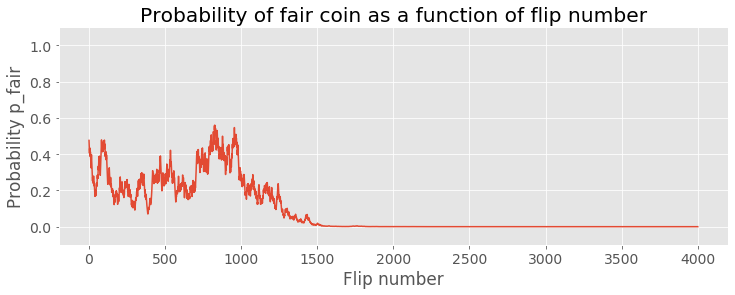

In [17]:
# lets do a simulation
np.random.seed(0) # try 0, 1, and 2

print(f"The actual probability is {p}.")
indicate_coin_picked(p)

# initialize
priors = [0.5, 0.5]
flips_lst = []

# set the number of flips
num_flips = 4000
p_fair_arr = np.zeros(num_flips)

for i in range(num_flips):
    flip_the_coin(p, flips_lst)
    likelihoods = calculate_likelihood(flips_lst)
    posteriors = calculate_posterior(likelihoods, priors)
    p_fair_arr[i] = posteriors[0]
    priors = posteriors

print("\nPosteriors after {0} trials".format(num_flips))
print("Probability Fair {0:0.3f}, Not fair {1:0.3f}".format(posteriors[0], posteriors[1]))

plot_pfair_prob(num_flips, p_fair_arr)